In [1]:
# !pip install "tensorflow<2.11" opencv-python matplotlib
# !pip list # Uncomment first part to check dependencies/versions
# !python -m pip install --upgrade pip

In [ ]:
import os
import sys

# Set the environment variable
os.environ['PYTHONIOENCODING'] = 'utf-8'

# Check if the environment variable is set
pythonioencoding = os.environ.get('PYTHONIOENCODING')
print(f"PYTHONIOENCODING: {pythonioencoding}")

# Check the default encoding for stdout and stderr
stdout_encoding = sys.stdout.encoding
stderr_encoding = sys.stderr.encoding
print(f"sys.stdout encoding: {stdout_encoding}")
print(f"sys.stderr encoding: {stderr_encoding}")

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 4626 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

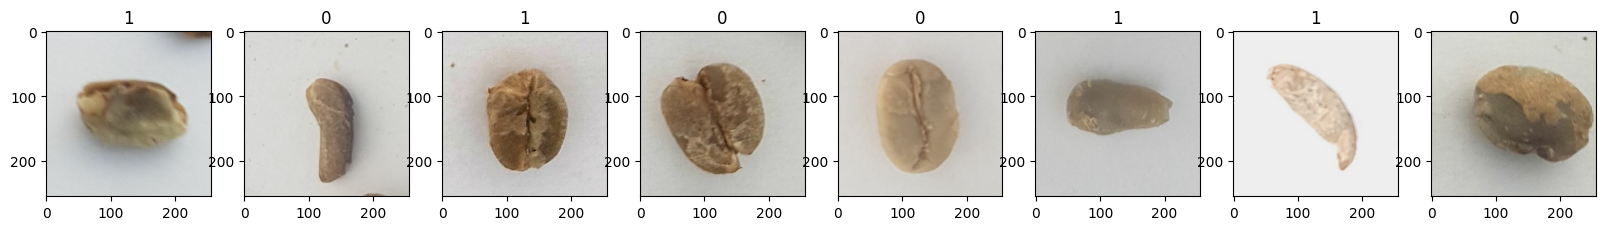

In [8]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20)) # 0 is bad bean
for idx, img in enumerate(batch[0][8:16]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train_size

101

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32, (2,2), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (2,2), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (2,2), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0005  # Set your desired learning rate here

# Create an instance of the Adam optimizer with the custom learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0

In [19]:
logdir='logs'


In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
101/101 [==============================] - 15s 107ms/step - loss: 0.6556 - accuracy: 0.6562 - val_loss: 0.5407 - val_accuracy: 0.7338
Epoch 2/20
101/101 [==============================] - 11s 106ms/step - loss: 0.4834 - accuracy: 0.7618 - val_loss: 0.4926 - val_accuracy: 0.7640
Epoch 3/20
101/101 [==============================] - 11s 107ms/step - loss: 0.4670 - accuracy: 0.7683 - val_loss: 0.4839 - val_accuracy: 0.7716
Epoch 4/20
101/101 [==============================] - 11s 108ms/step - loss: 0.4447 - accuracy: 0.7831 - val_loss: 0.4326 - val_accuracy: 0.8082
Epoch 5/20
101/101 [==============================] - 11s 108ms/step - loss: 0.4269 - accuracy: 0.7958 - val_loss: 0.4200 - val_accuracy: 0.8093
Epoch 6/20
101/101 [==============================] - 11s 108ms/step - loss: 0.4080 - accuracy: 0.8048 - val_loss: 0.3883 - val_accuracy: 0.8147
Epoch 7/20
101/101 [==============================] - 11s 108ms/step - loss: 0.3938 - accuracy: 0.8199 - val_loss: 0.4076 - val_ac

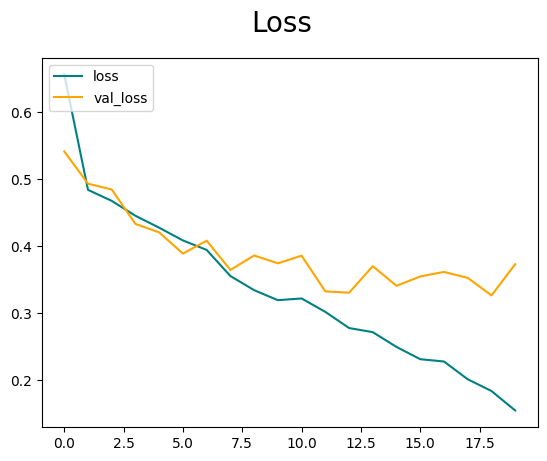

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

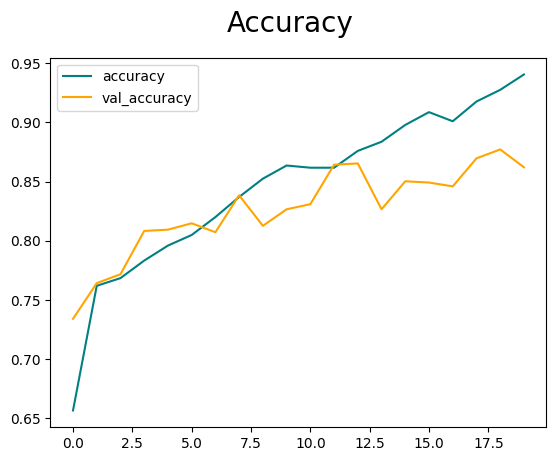

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 29ms/step
tf.Tensor(0.812749, shape=(), dtype=float32) tf.Tensor(0.9026549, shape=(), dtype=float32) tf.Tensor(0.84598213, shape=(), dtype=float32)


In [25]:
from tensorflow.keras.models import load_model

In [26]:
model.save(os.path.join('models','CoffeeModel1.h5'))